In [1]:
#invite people for the Kaggle party
# Good explaination about this competition
# https://www.kaggle.com/pmarcelino/comprehensive-data-exploration-with-python
import pandas as pd
from IPython import display
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy.stats import norm
from sklearn.preprocessing import StandardScaler
from scipy import stats
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

df_train = pd.read_csv('./dataSet/train.csv')
# test = pd.read_csv('./dataSet/test.csv')

In [2]:
class Eda:
    def __init__(self, train):
        self.train = train
    
    def show_columns(self, df):
        display.display(df.columns)
        
    def histogram(self, series):
        sns.distplot(series)
        #skewness and kurtosis
        print("Skewness: %f" % df_train['SalePrice'].skew())
        print("Kurtosis: %f" % df_train['SalePrice'].kurt())
            
    def scatter_saleprice(self, target):
        data = pd.concat([self.train['SalePrice'], self.train[target]], axis=1)
        data.plot.scatter(x=target, y='SalePrice', ylim=(0, 500000))
        
    def box_plot(self, target, cols, row):
        data = pd.concat([self.train['SalePrice'], self.train[target]], axis=1)
        f, ax = plt.subplots(figsize=(cols, row))
        fig = sns.boxplot(x=target, y='SalePrice', data=data)
        fig.axis(ymin=0, ymax=500000)
        
    def correlation_matrix(self, k=None):
        corrmat = self.train.corr()
        if k:
            cols = corrmat.nlargest(k, 'SalePrice')['SalePrice'].index
            cm = np.corrcoef(self.train[cols].values.T)
            sns.set(font_scale=1.25)
            hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 10}, yticklabels=cols.values, xticklabels=cols.values)
            plt.show()
        else:
            f, ax = plt.subplots(figsize=(12, 9))
            sns.heatmap(corrmat, vmax=.8, square=True);
        
    def pair_plot(self, cols, size):
        sns.set()
        sns.pairplot(self.train[cols], size=size)
        plt.show()
        
eda = Eda(df_train)

In [3]:
eda.show_columns(df_train)

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

Skewness: 1.882876
Kurtosis: 6.536282


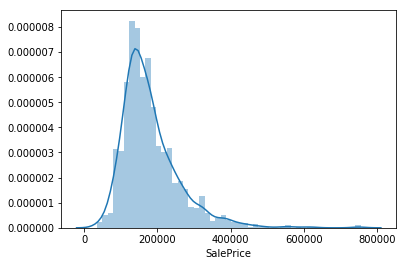

In [4]:
eda.histogram(df_train['SalePrice'])

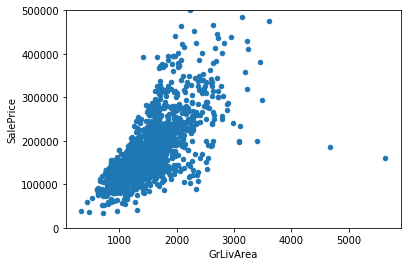

In [5]:
#scatter plot grlivarea/saleprice
eda.scatter_saleprice('GrLivArea')

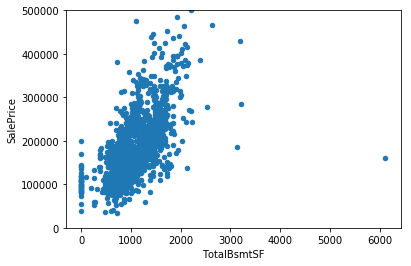

In [6]:
#scatter plot totalbsmtsf/saleprice
eda.scatter_saleprice('TotalBsmtSF')

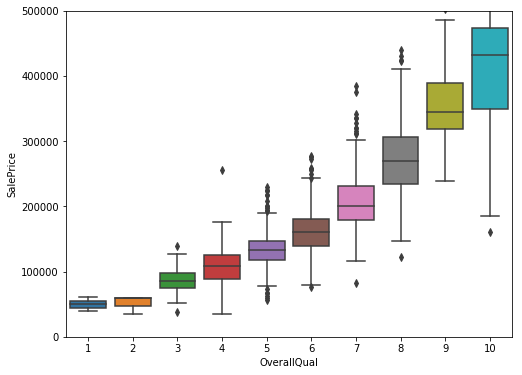

In [7]:
#box plot overallqual/saleprice
eda.box_plot('OverallQual', 8, 6)

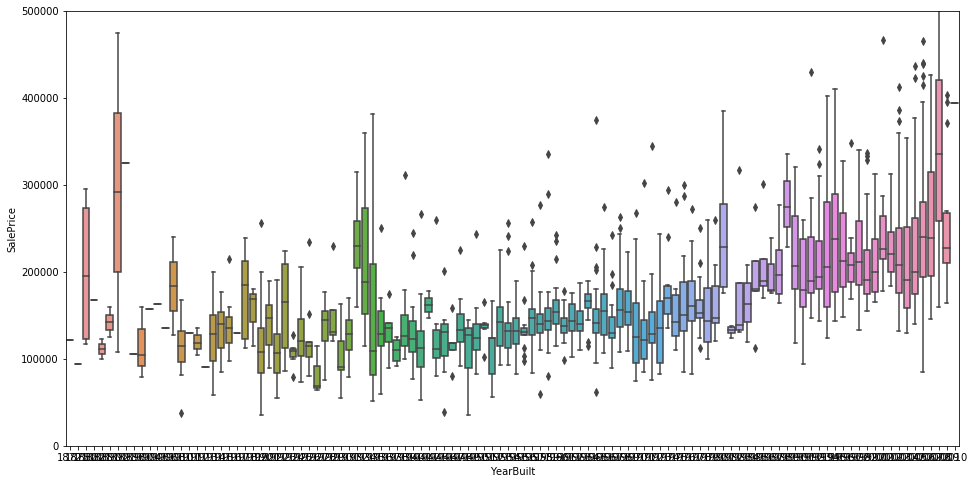

In [8]:
#box plot YearBuit/saleprice
eda.box_plot('YearBuilt', 16, 8)

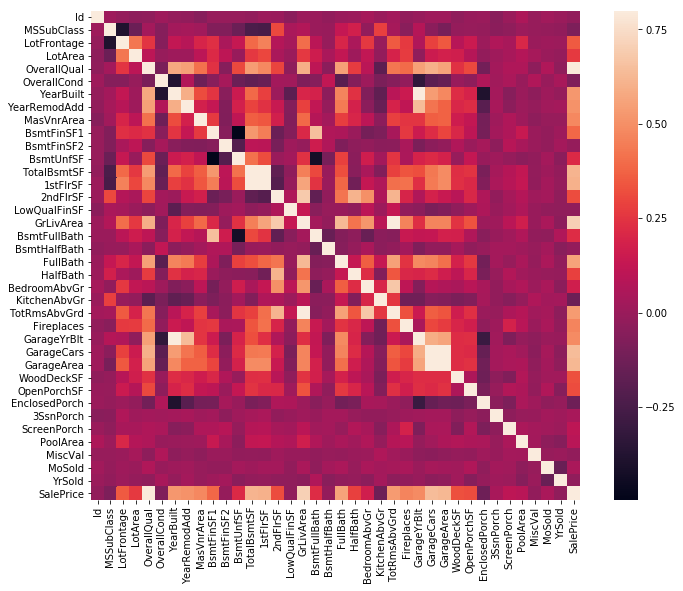

In [9]:
eda.correlation_matrix()

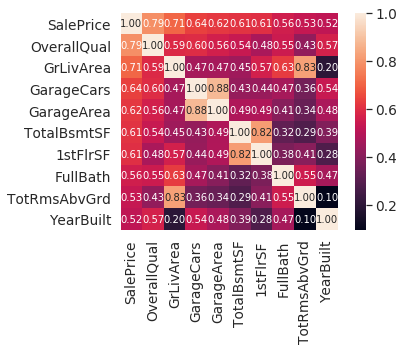

In [10]:
eda.correlation_matrix(10)

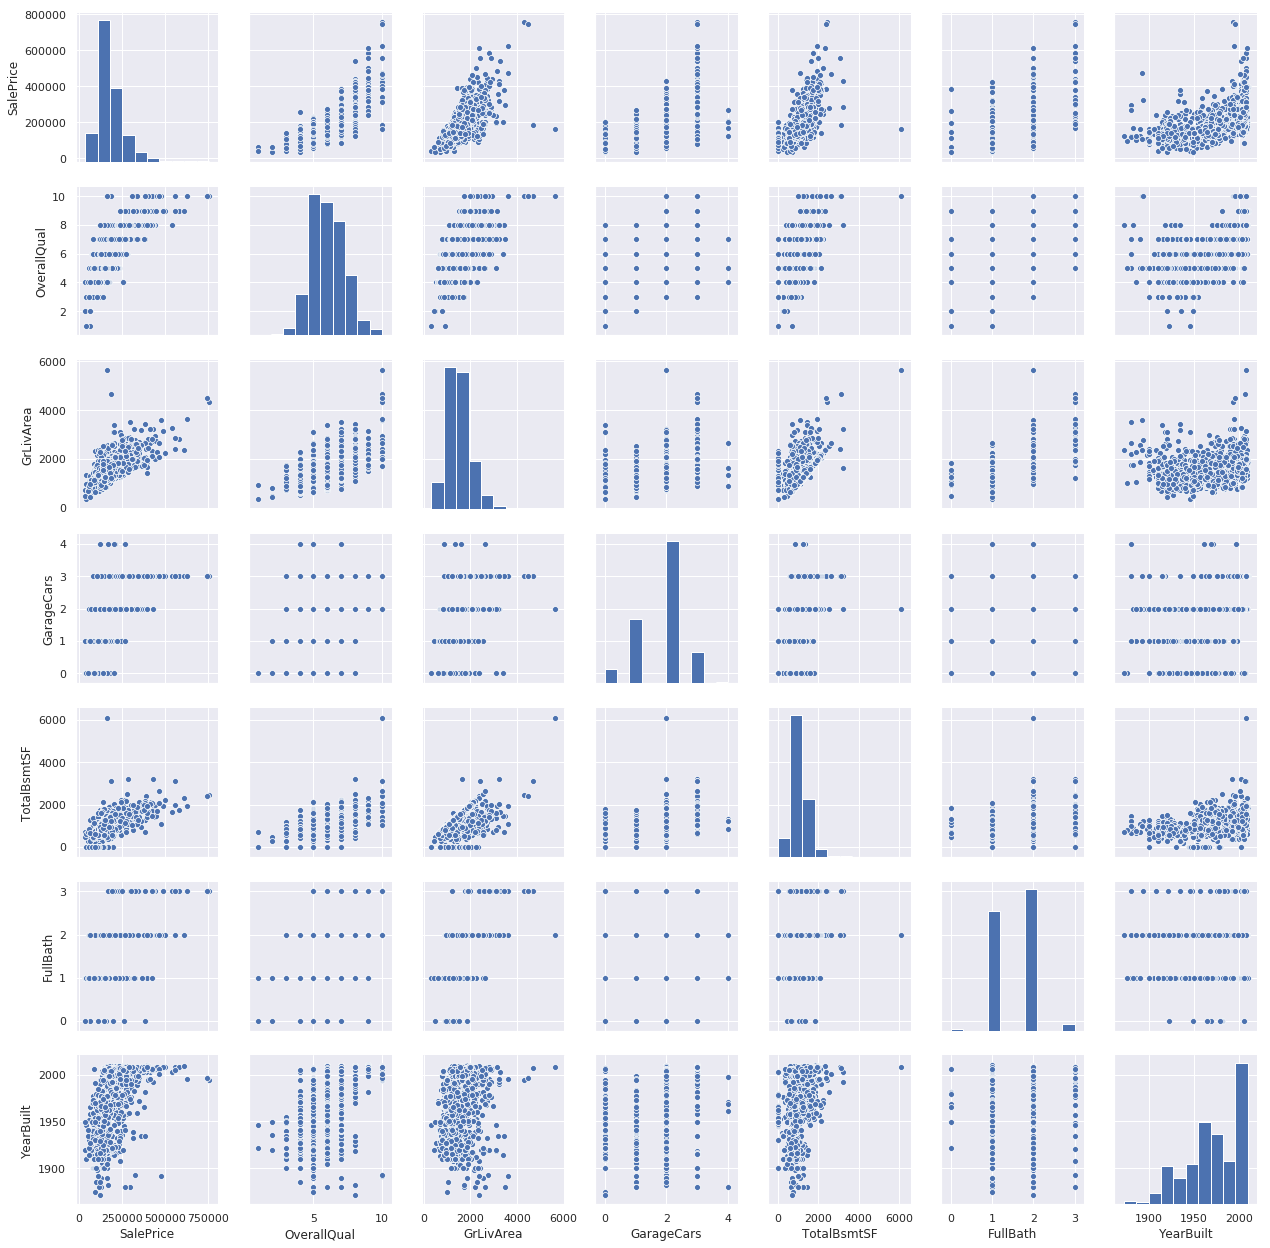

In [11]:
# scatter pair plot
cols = ['SalePrice', 'OverallQual', 'GrLivArea', 'GarageCars', 'TotalBsmtSF', 'FullBath', 'YearBuilt']
eda.pair_plot(cols, 2.5)

In [12]:
# Missing data
total = df_train.isnull().sum().sort_values(ascending=False)
percent = (df_train.isnull().sum()/df_train.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data.head(20)

,Total,Percent
PoolQC,1453,0.995205
MiscFeature,1406,0.963014
Alley,1369,0.937671
Fence,1179,0.807534
FireplaceQu,690,0.472603
LotFrontage,259,0.177397
GarageCond,81,0.055479
GarageType,81,0.055479
GarageYrBlt,81,0.055479
GarageFinish,81,0.055479


'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


Id
------------
MSSubClass
------------
MSZoning
------------
LotFrontage


'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


------------
LotArea
------------
Street
------------
Alley
------------
LotShape
------------
LandContour
------------
Utilities
------------
LotConfig
------------
LandSlope
------------
Neighborhood
------------
Condition1
------------
Condition2
------------
BldgType


'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches

------------
HouseStyle
------------
OverallQual
------------
OverallCond
------------
YearBuilt
------------
YearRemodAdd
------------
RoofStyle
------------
RoofMatl
------------
Exterior1st
------------
Exterior2nd
------------
MasVnrType
------------
MasVnrArea
------------
ExterQual
------------
ExterCond
------------
Foundation
------------
BsmtQual


'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


------------
BsmtCond
------------
BsmtExposure
------------
BsmtFinType1
------------
BsmtFinSF1


'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


------------
BsmtFinType2
------------
BsmtFinSF2
------------
BsmtUnfSF
------------
TotalBsmtSF
------------
Heating
------------
HeatingQC
------------
CentralAir
------------
Electrical


'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches

------------
1stFlrSF
------------
2ndFlrSF
------------
LowQualFinSF
------------
GrLivArea
------------
BsmtFullBath
------------
BsmtHalfBath


'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches

------------
FullBath
------------
HalfBath
------------
BedroomAbvGr
------------
KitchenAbvGr
------------
KitchenQual


'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


------------
TotRmsAbvGrd
------------
Functional
------------
Fireplaces
------------
FireplaceQu
------------
GarageType
------------
GarageYrBlt


'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


------------
GarageFinish
------------
GarageCars
------------
GarageArea
------------
GarageQual
------------
GarageCond


'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


------------
PavedDrive
------------
WoodDeckSF
------------
OpenPorchSF
------------
EnclosedPorch
------------
3SsnPorch


'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


------------
ScreenPorch
------------
PoolArea
------------
PoolQC
------------
Fence
------------
MiscFeature


'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


------------
MiscVal
------------
MoSold
------------
YrSold
------------
SaleType
------------
SaleCondition


'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


------------
SalePrice
------------


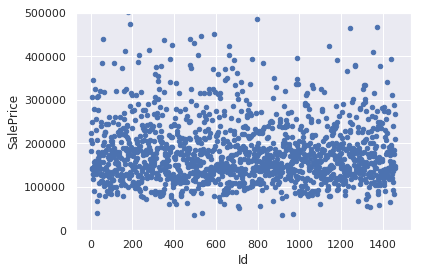

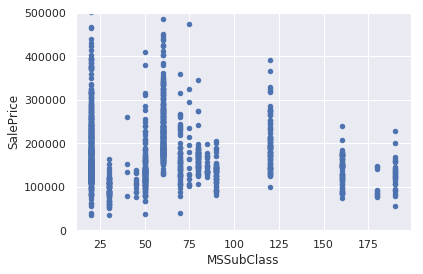

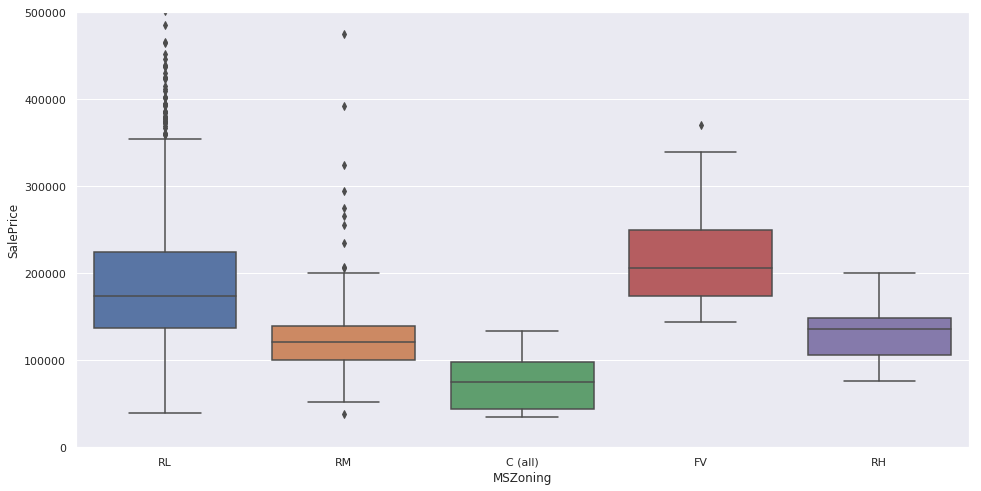

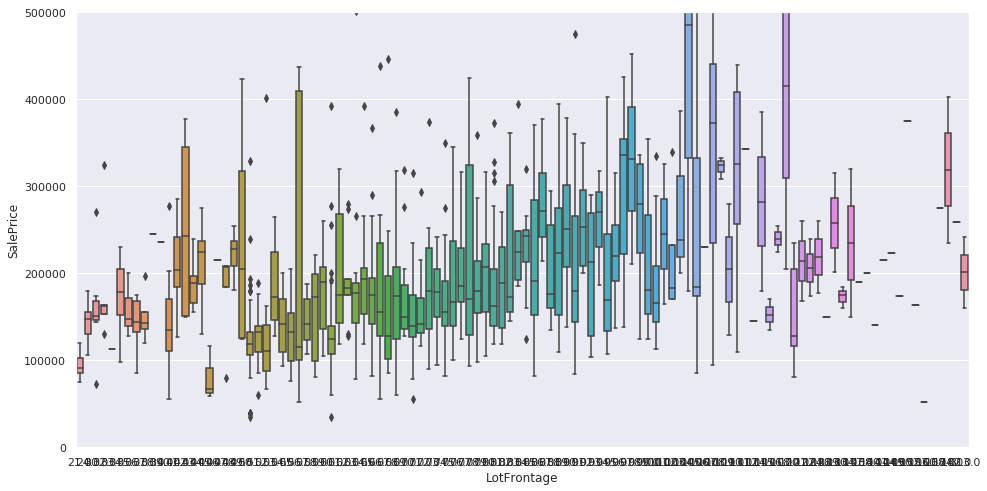

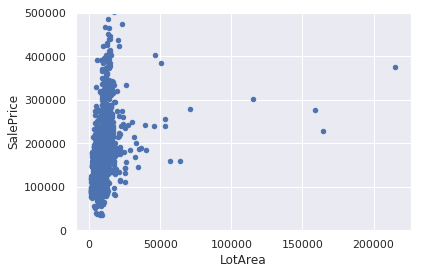

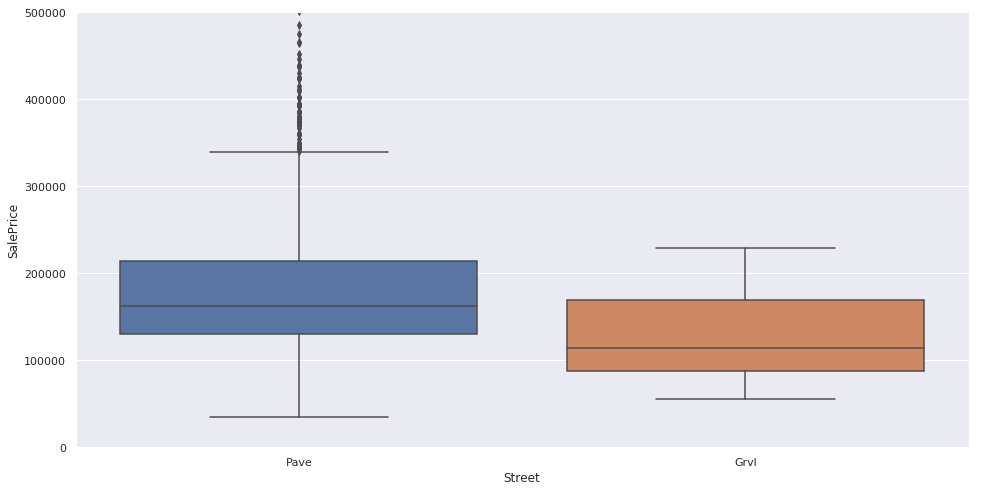

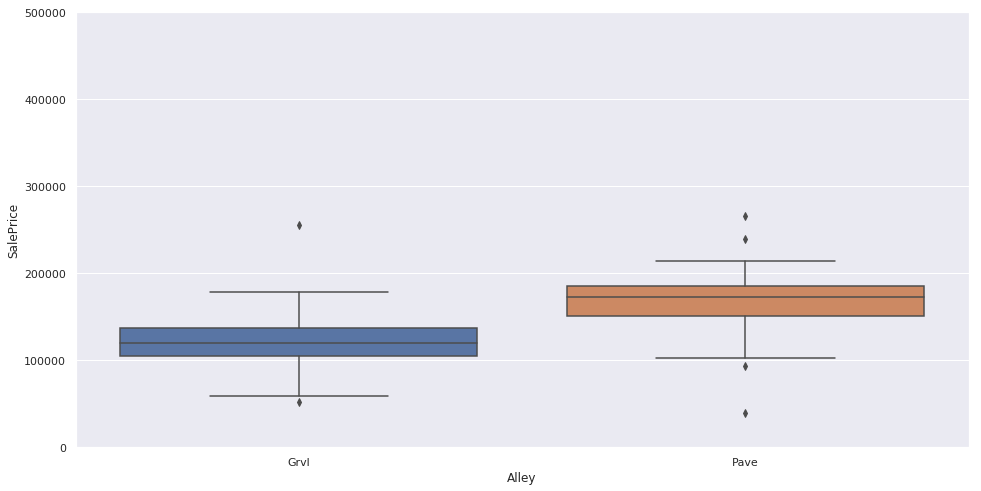

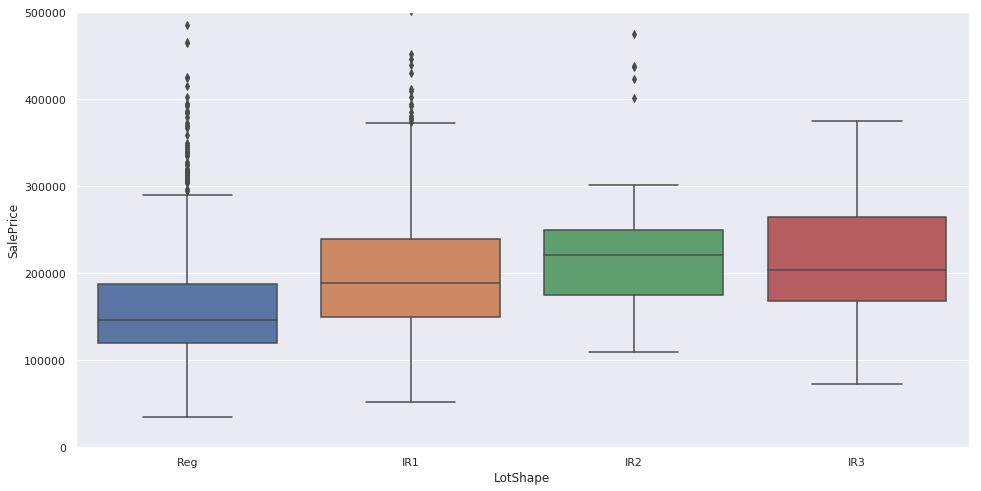

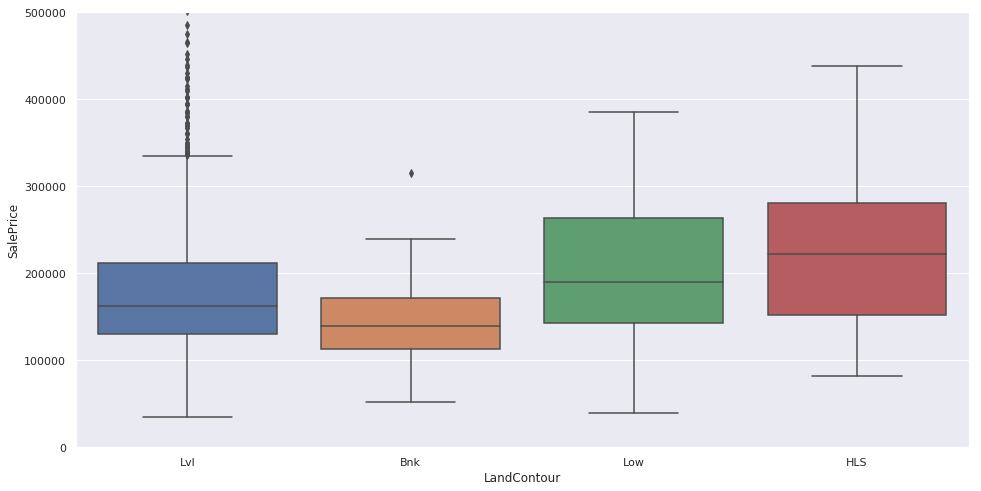

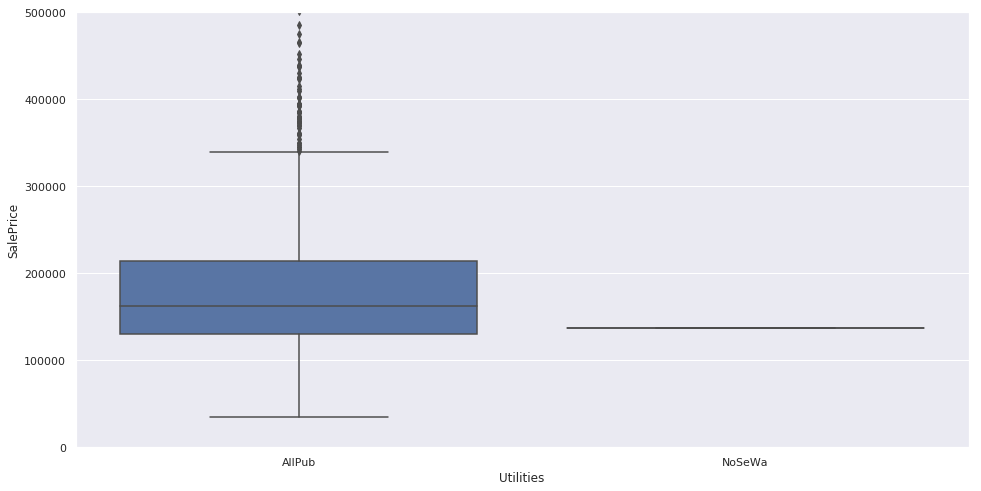

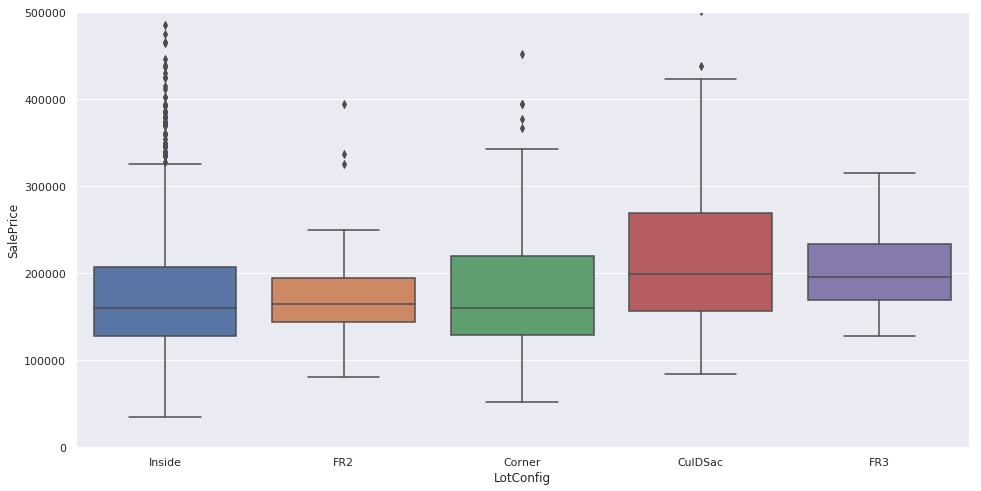

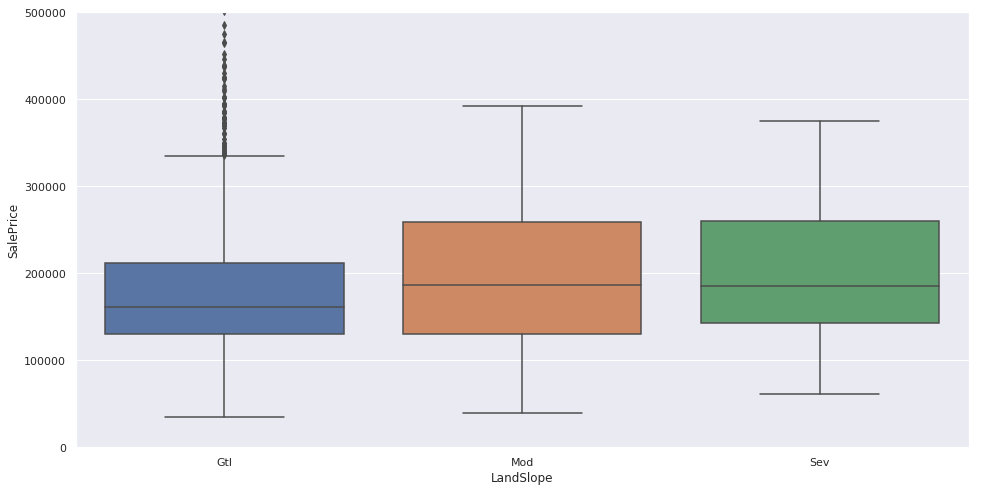

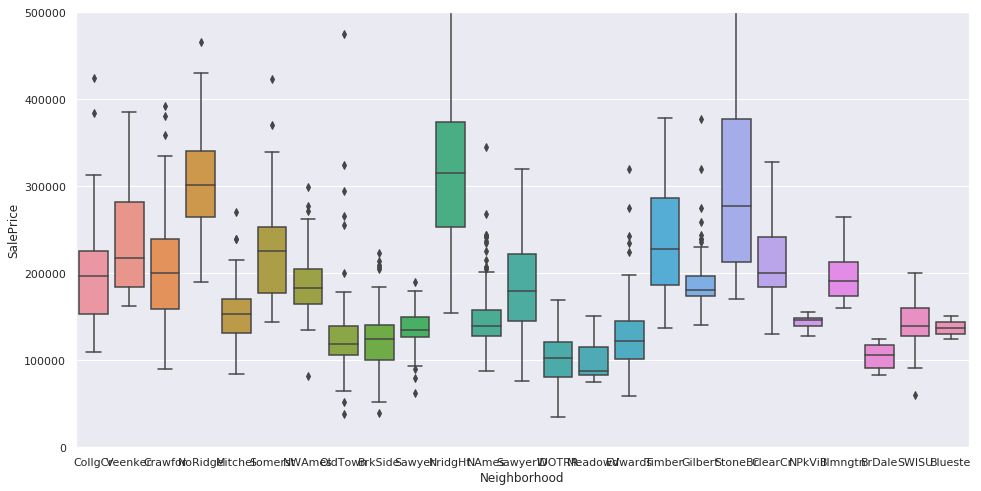

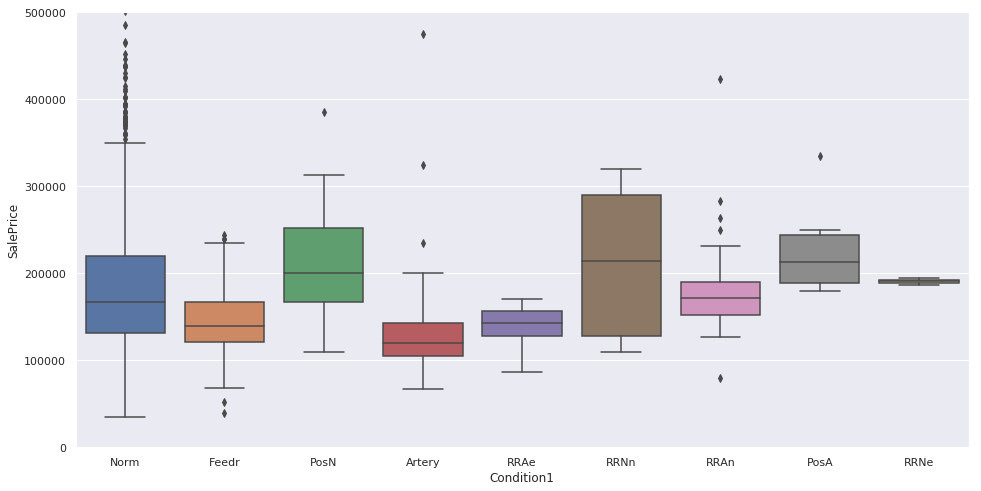

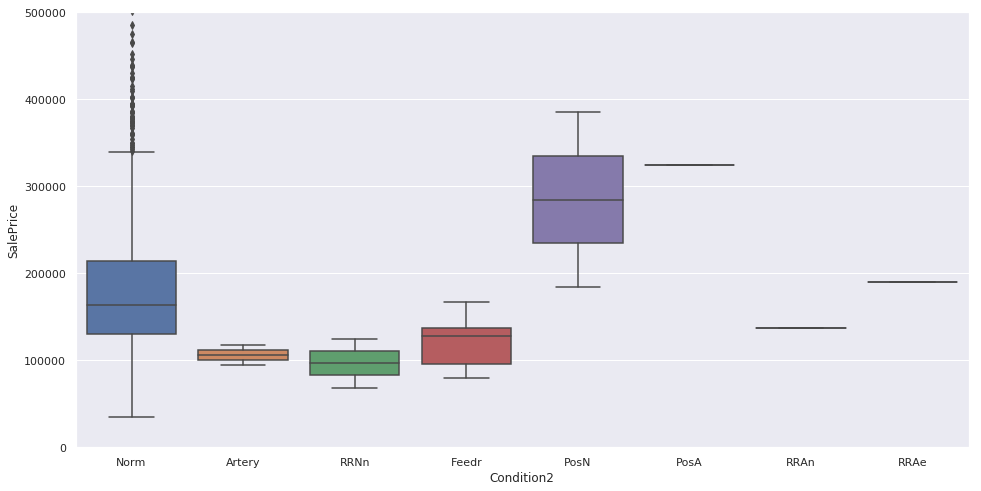

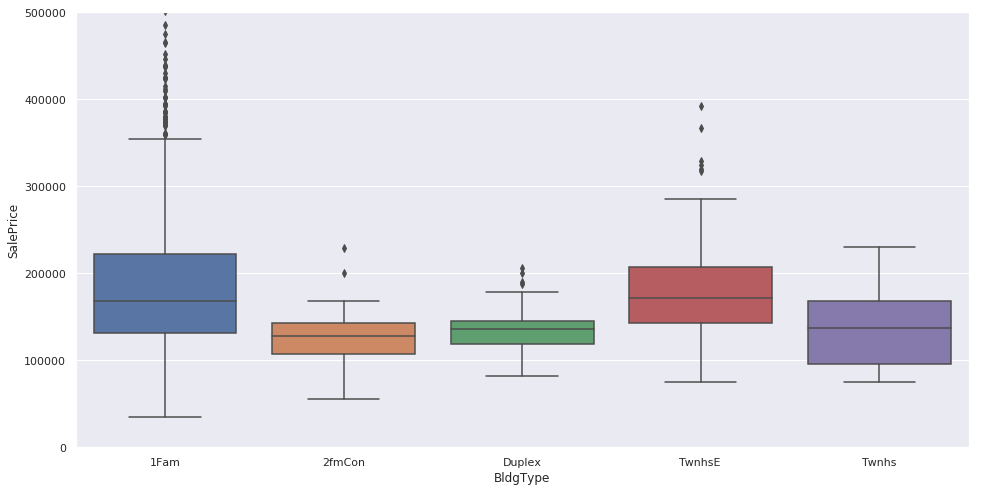

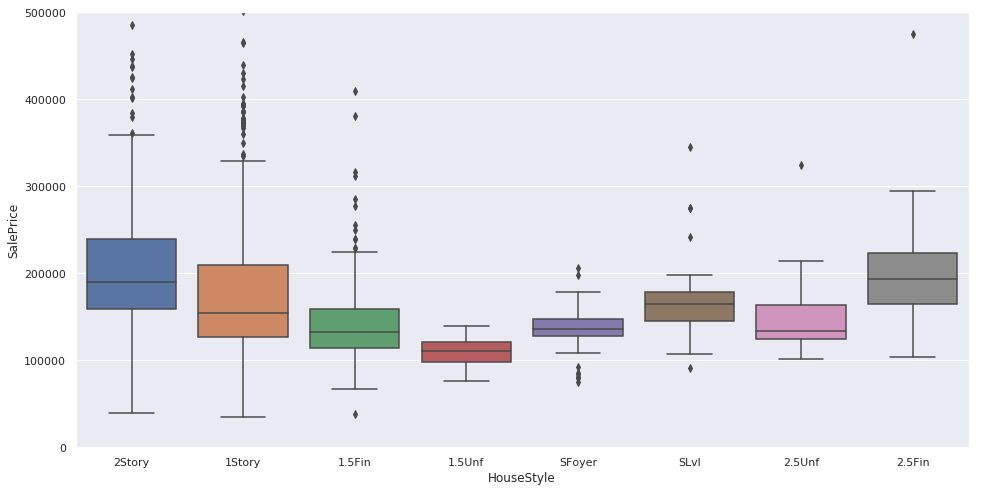

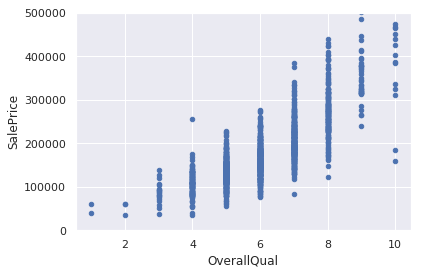

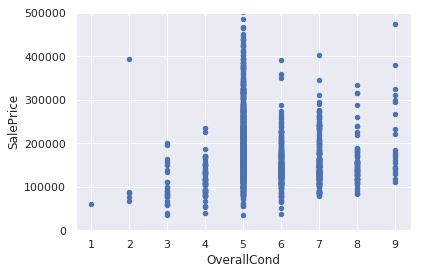

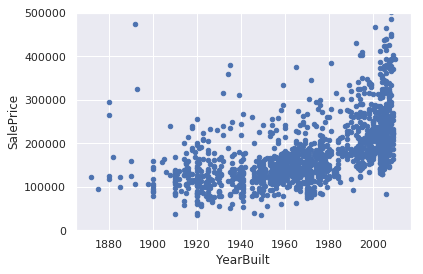

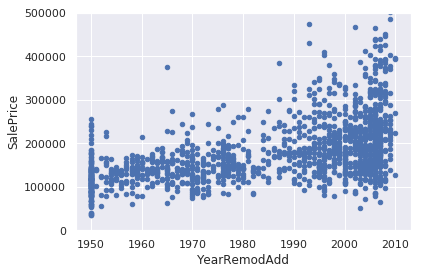

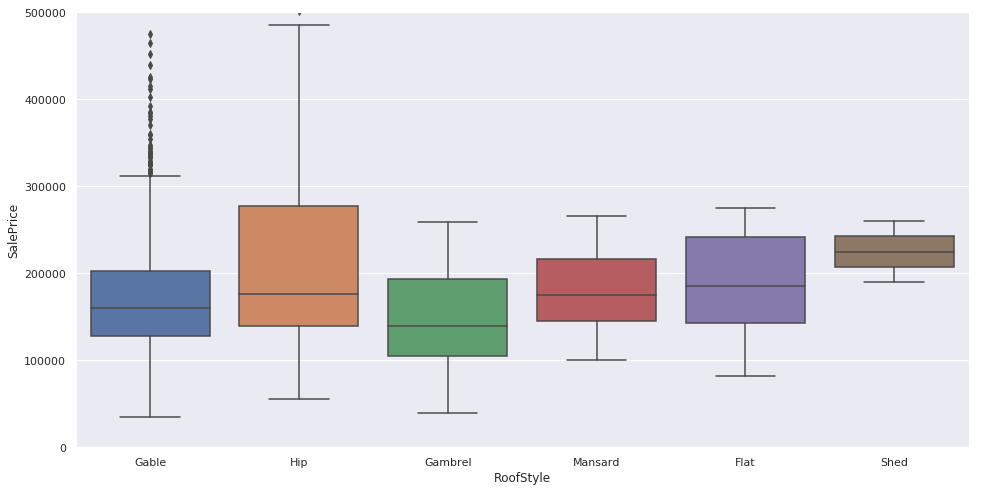

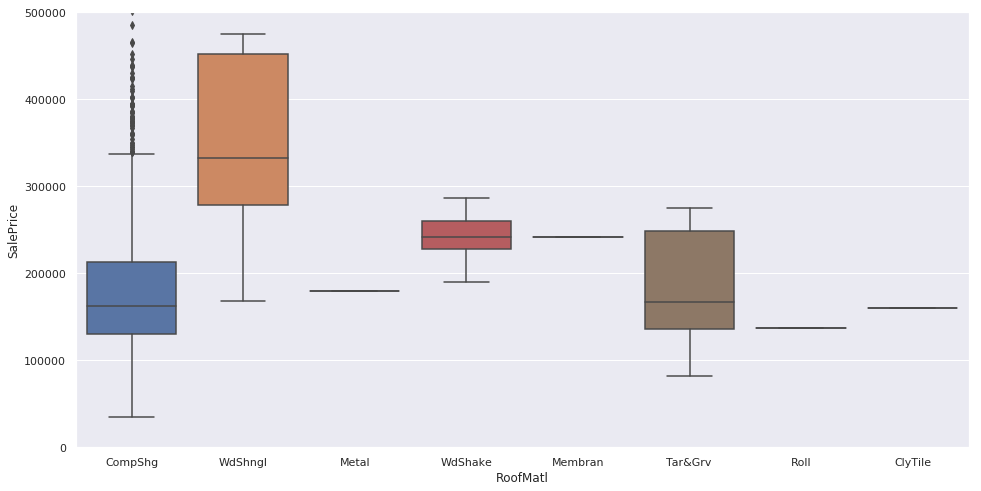

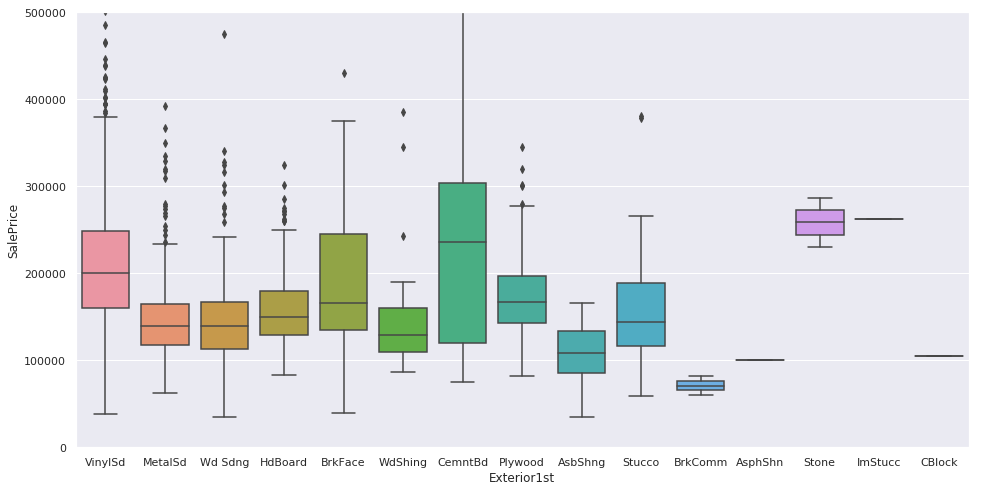

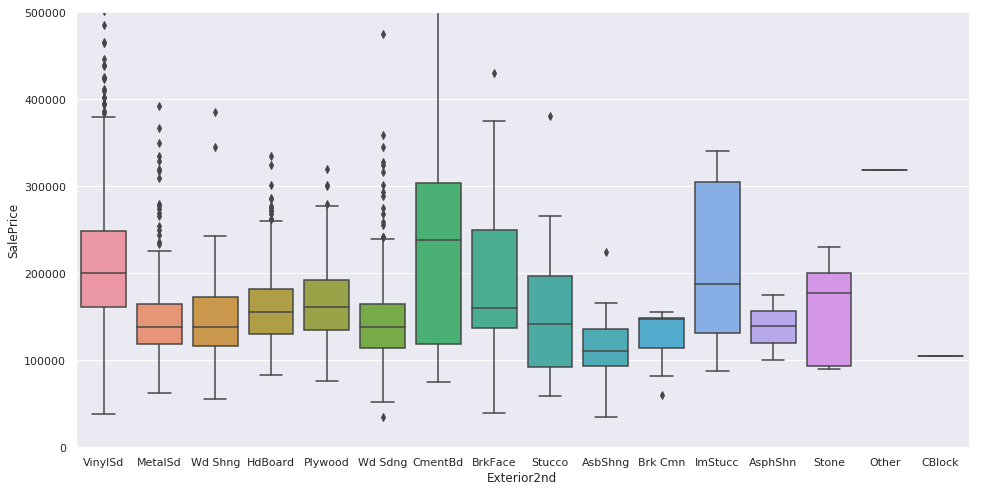

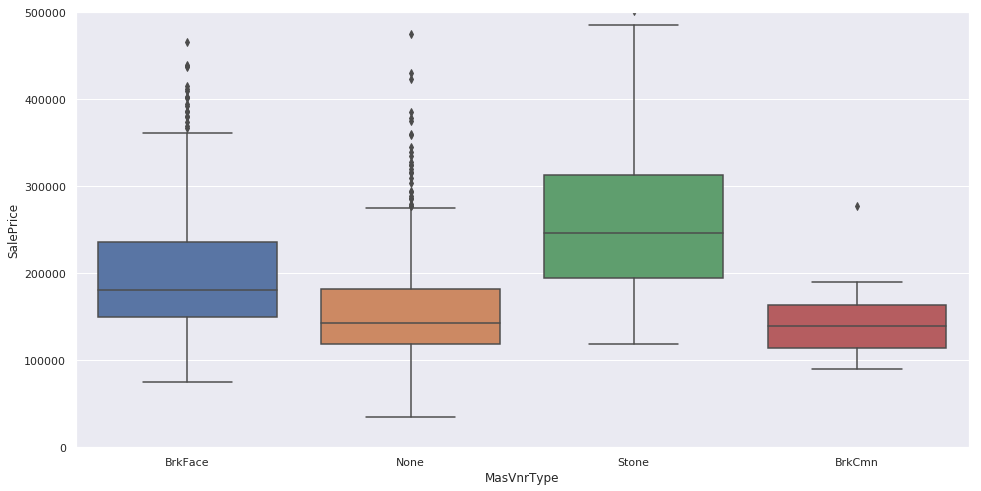

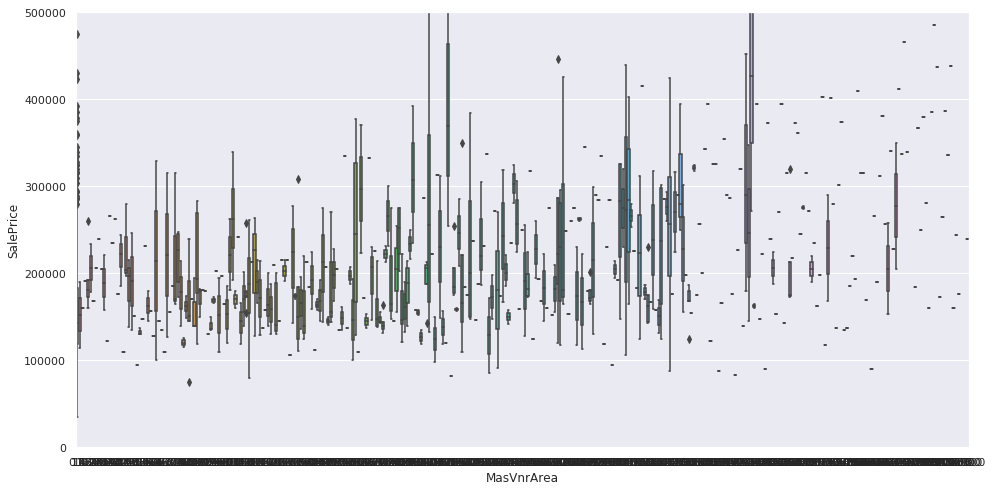

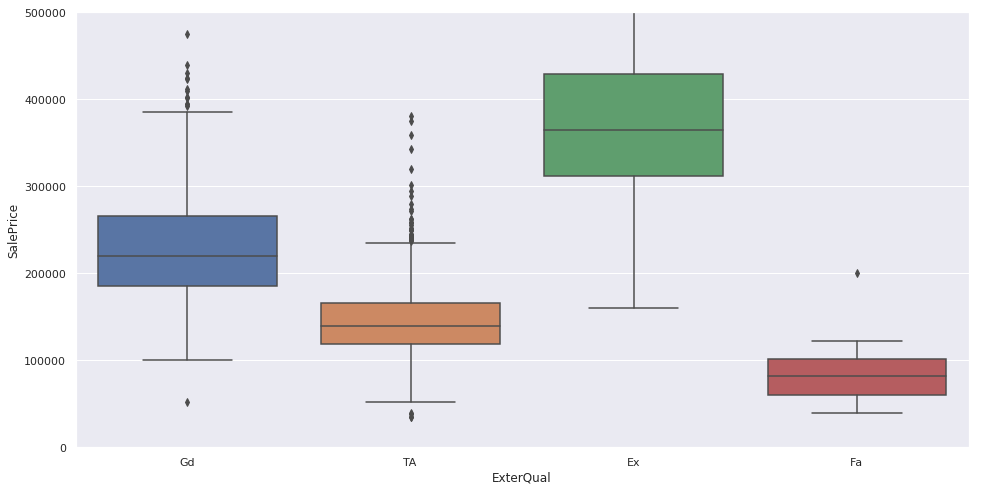

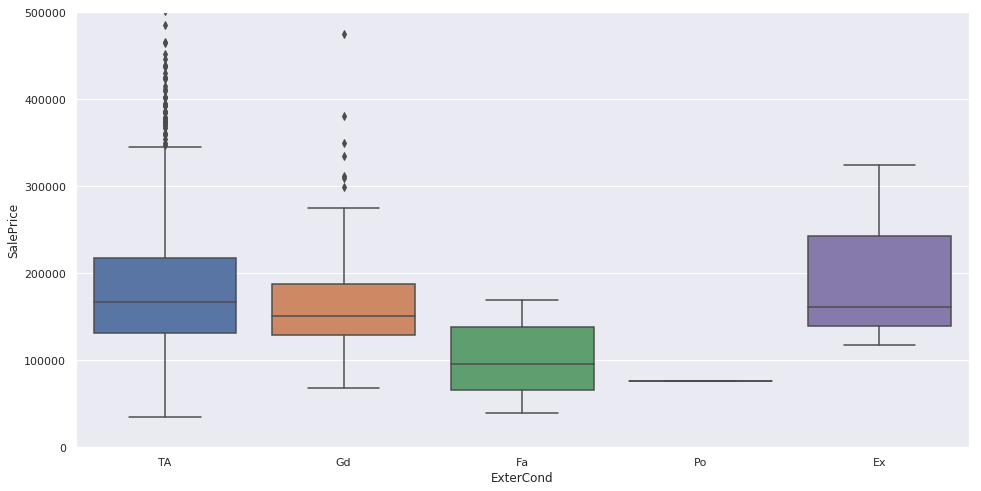

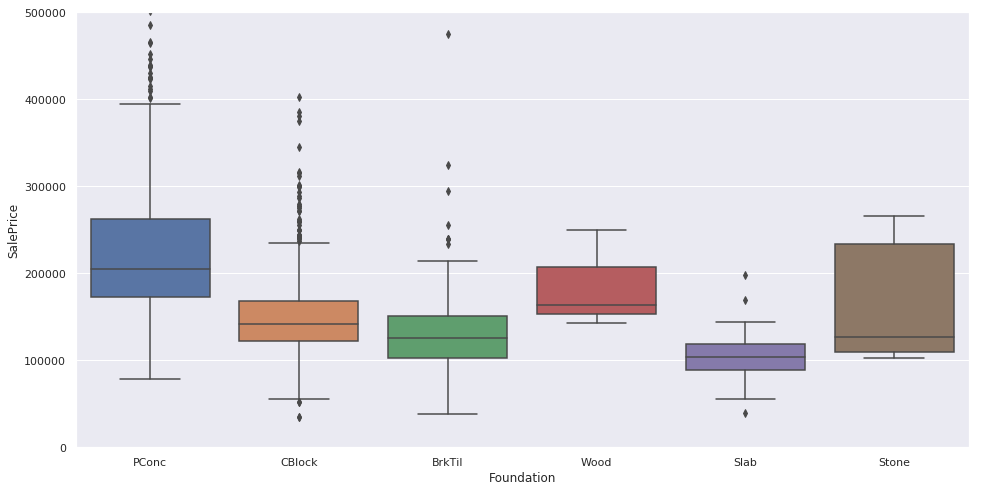

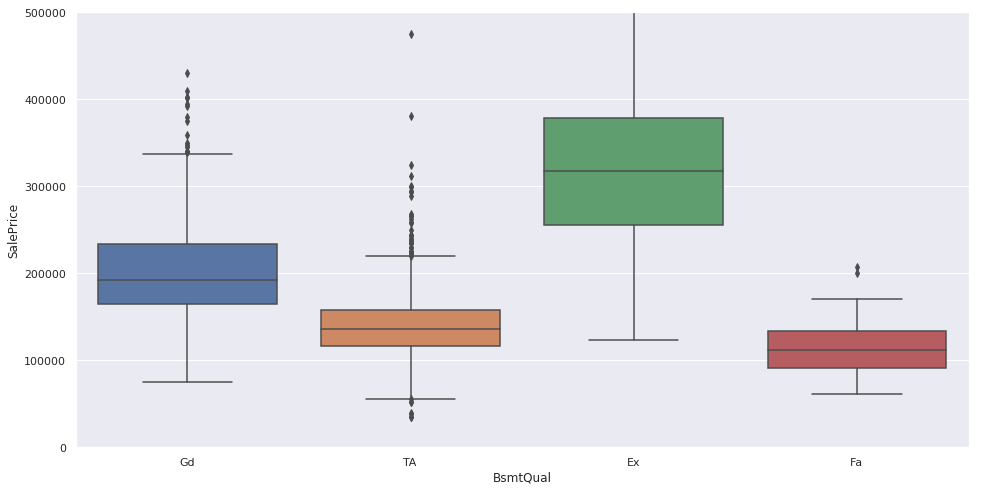

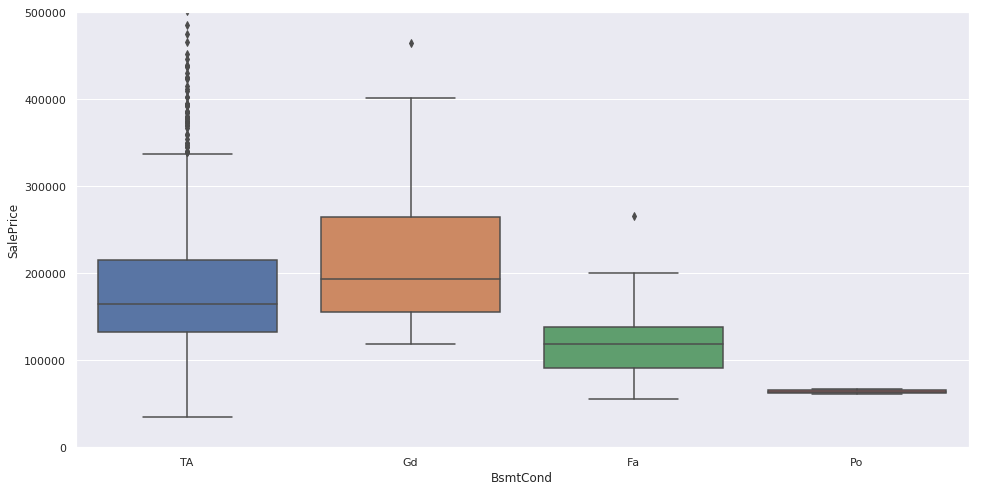

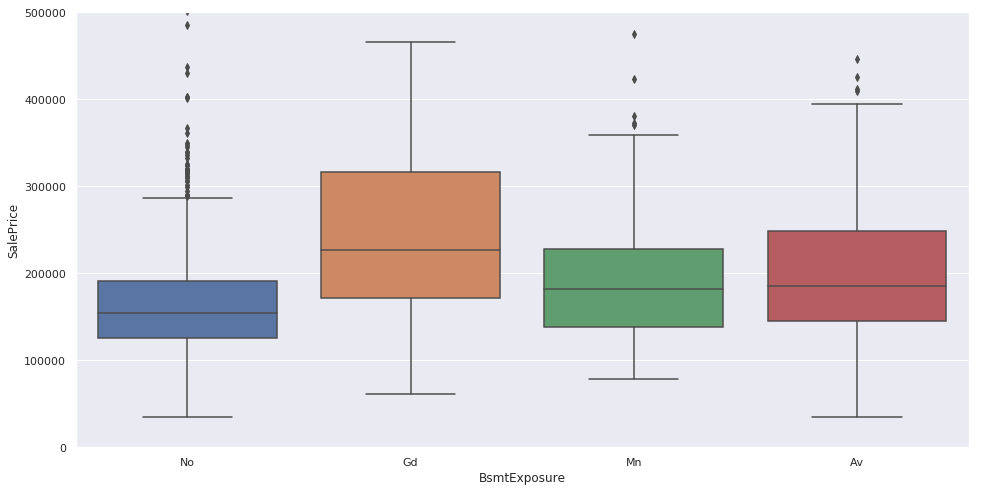

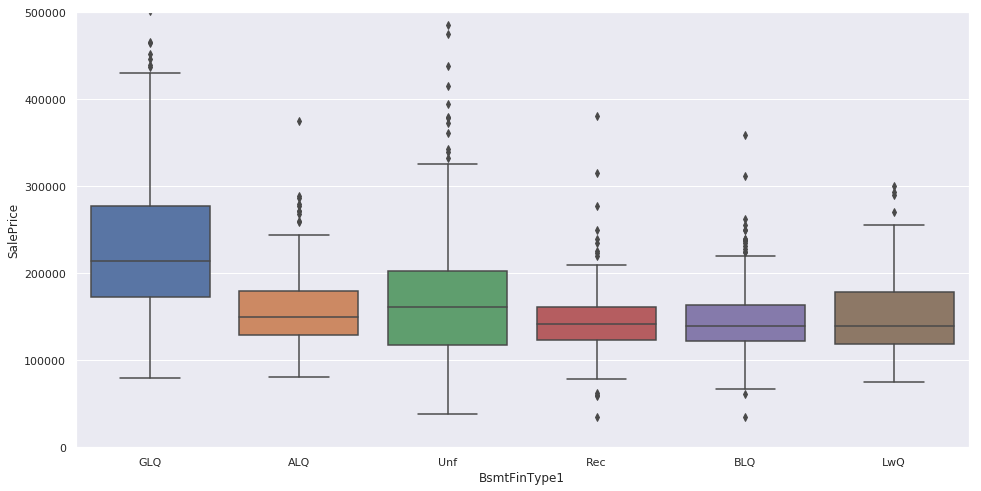

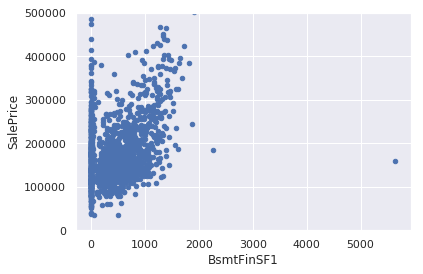

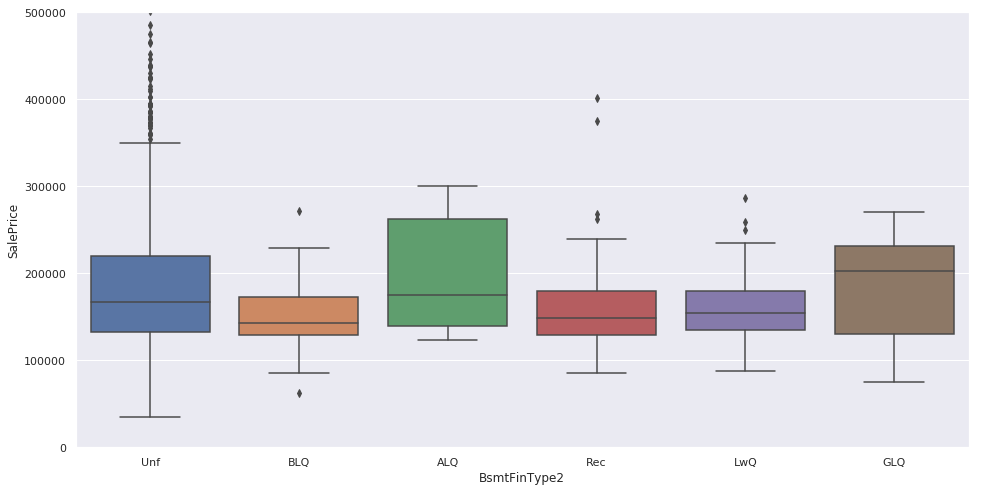

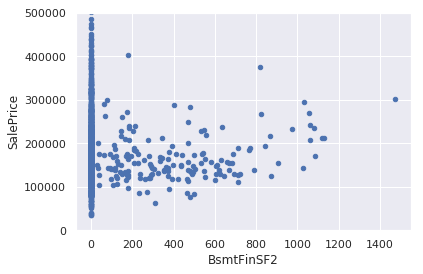

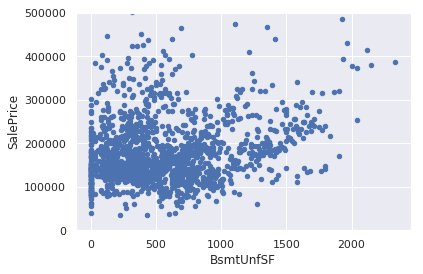

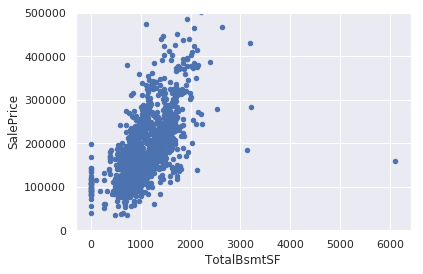

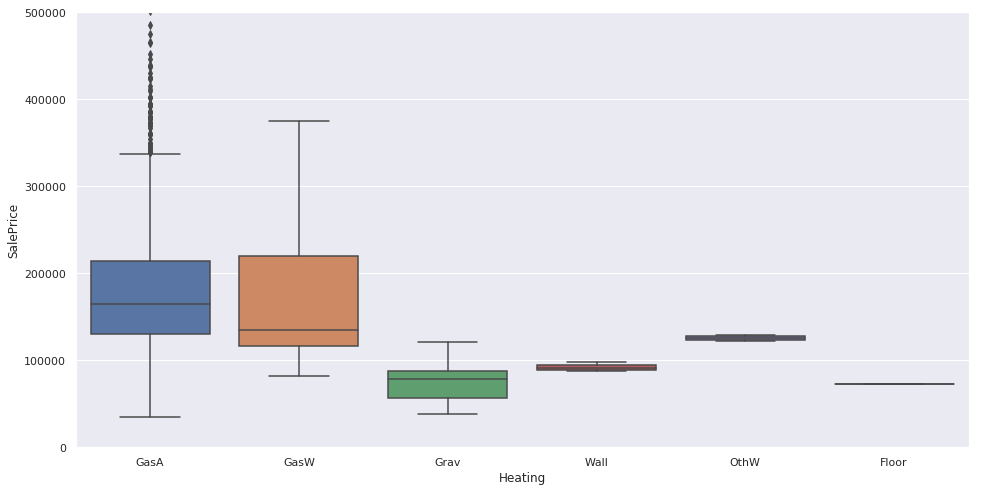

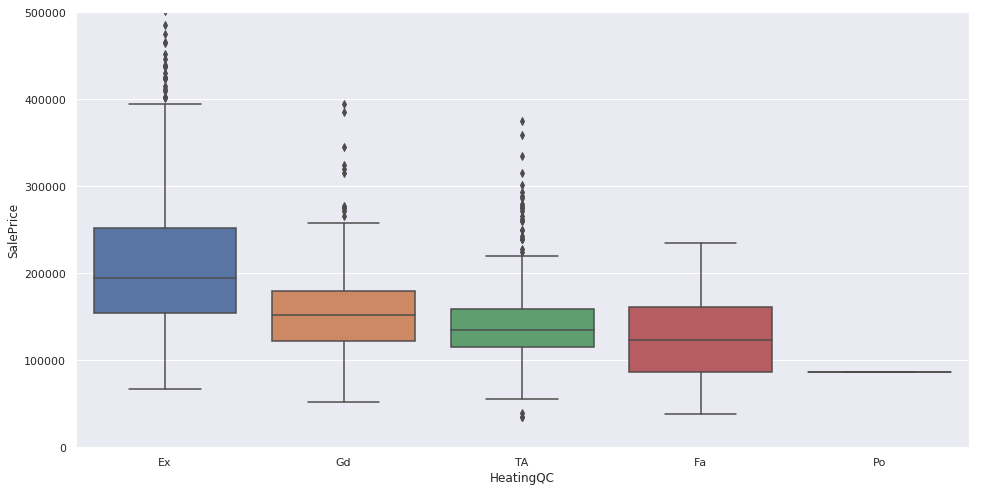

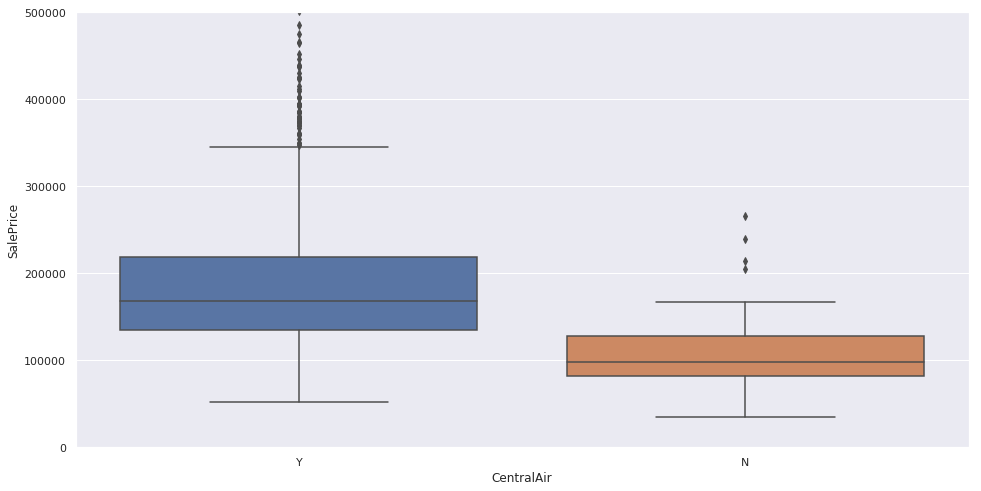

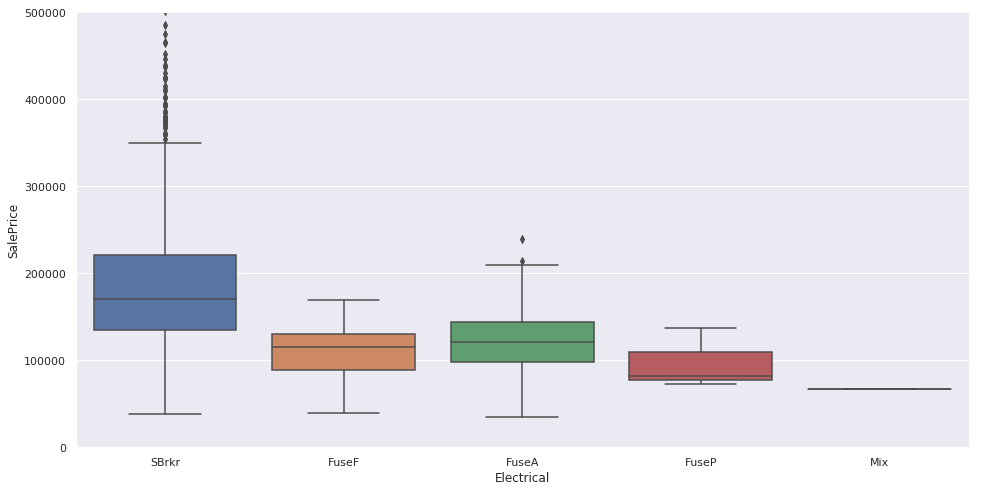

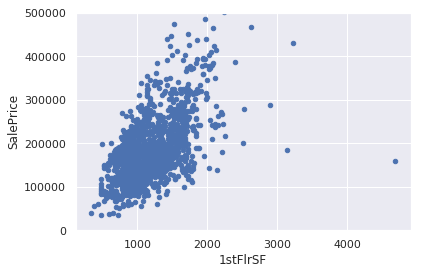

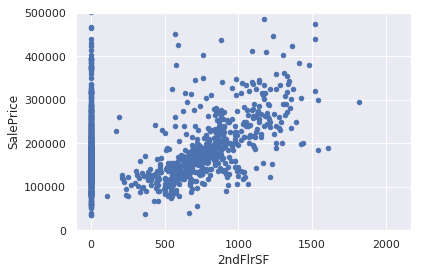

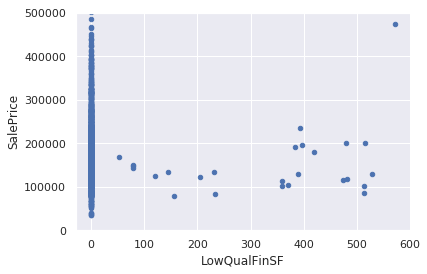

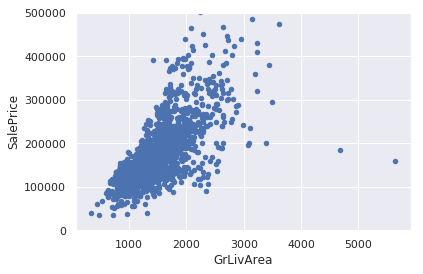

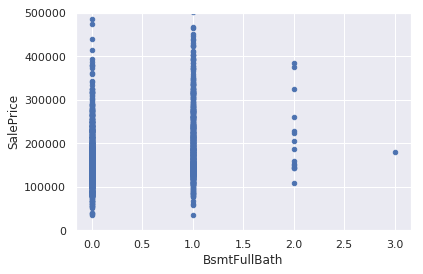

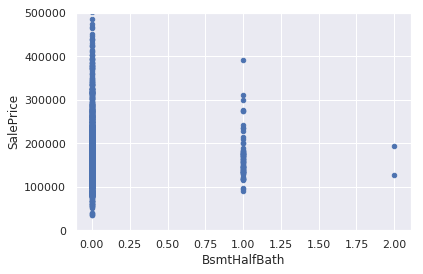

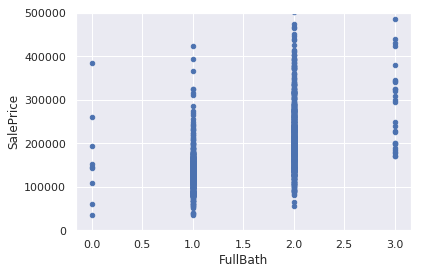

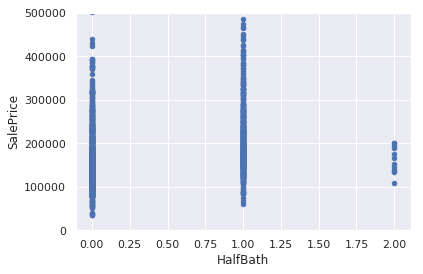

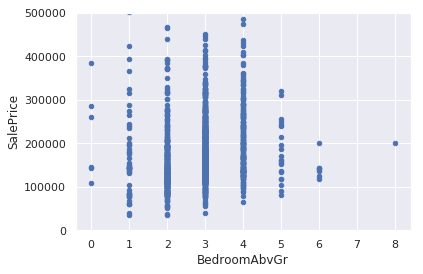

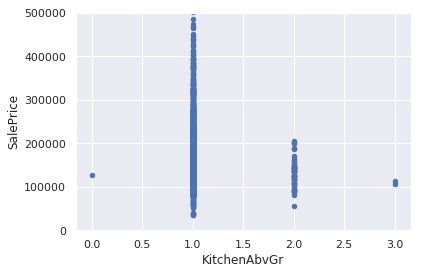

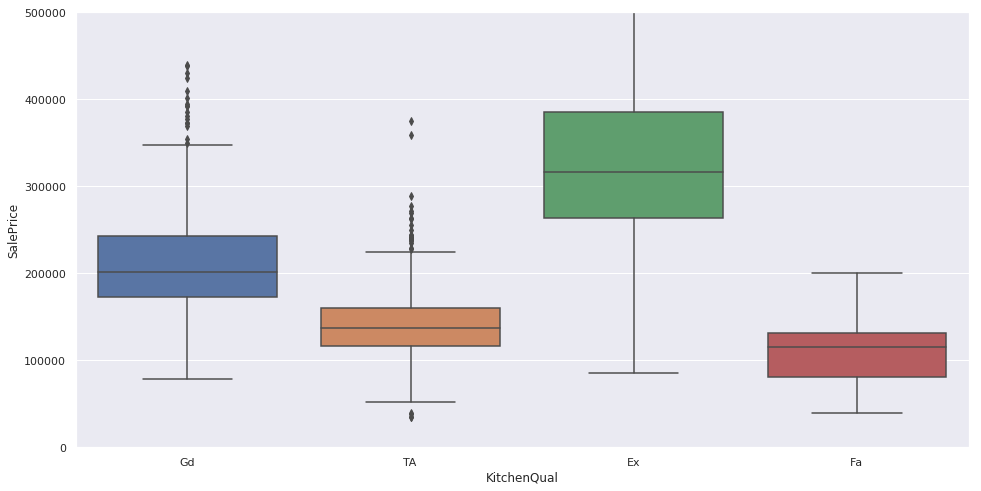

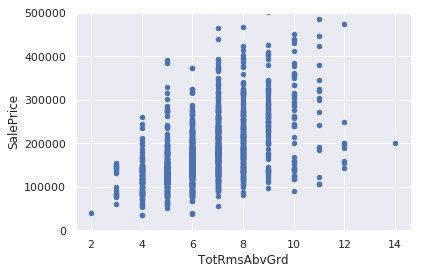

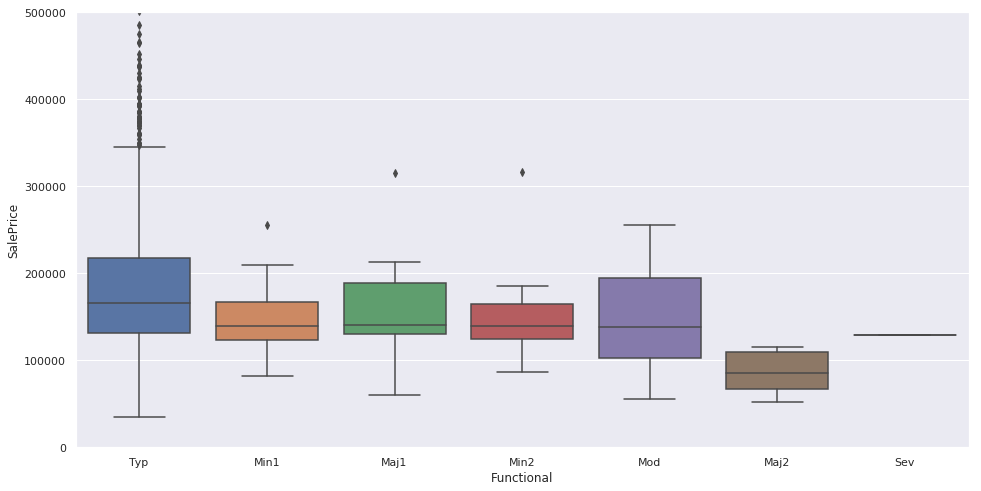

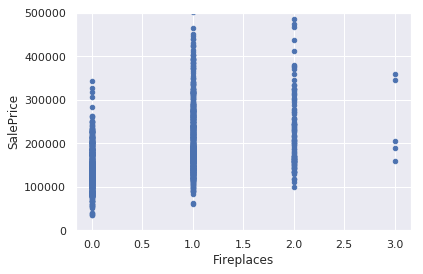

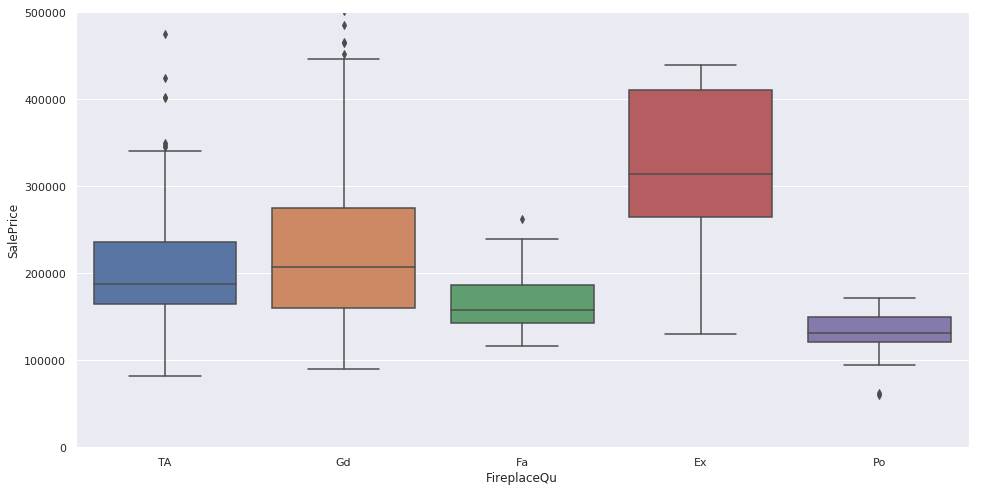

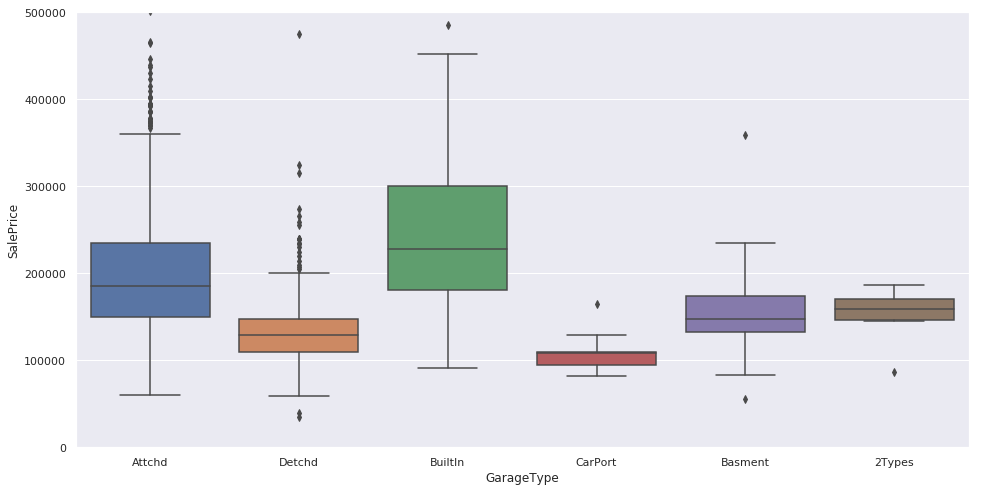

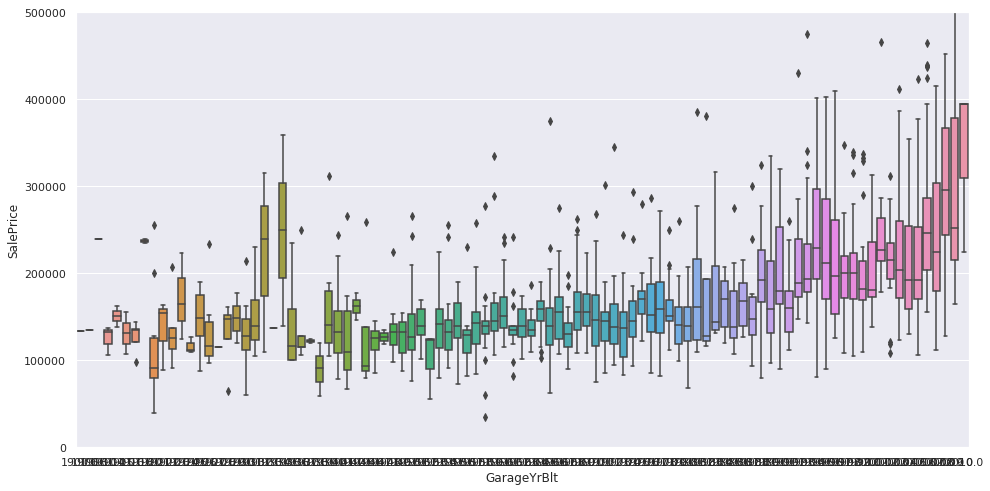

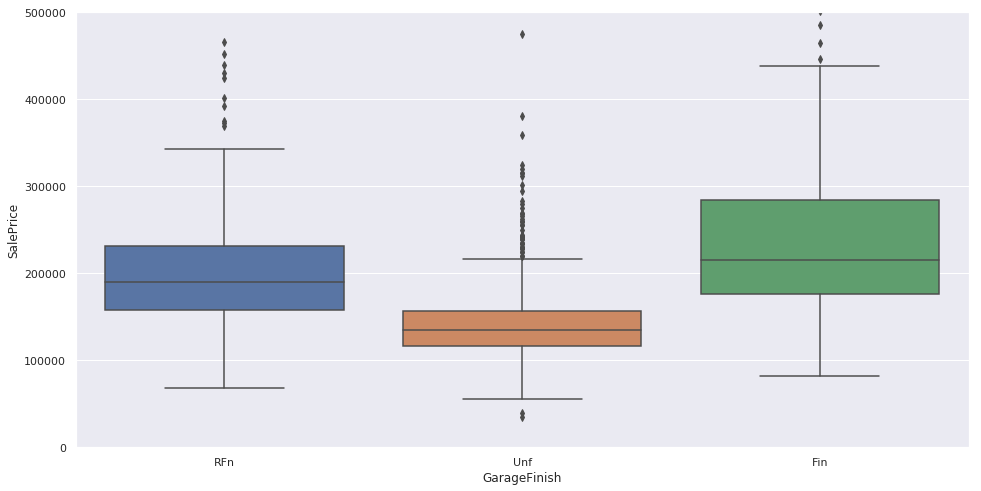

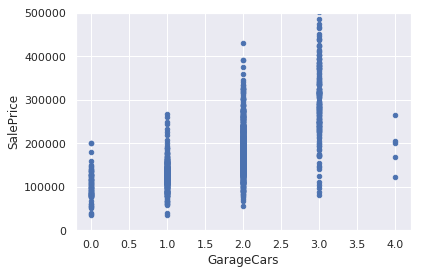

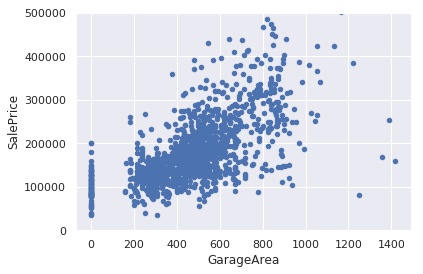

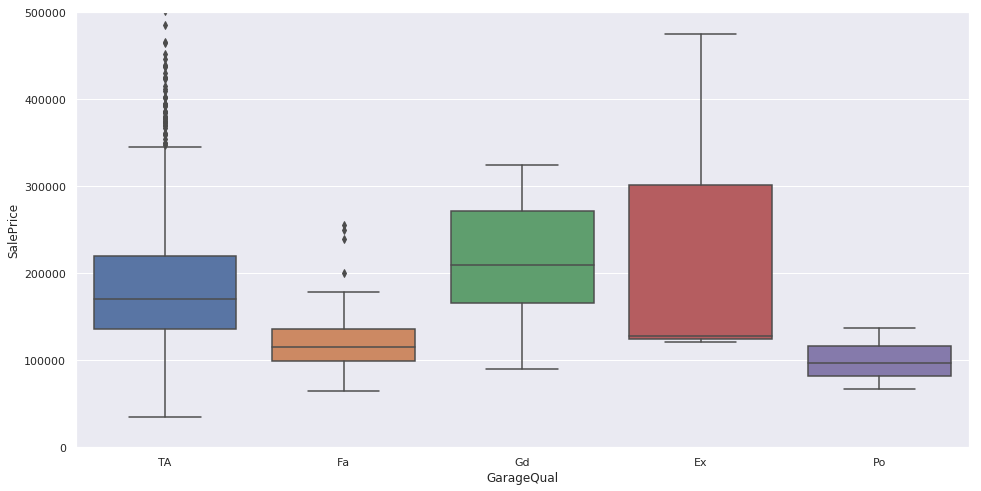

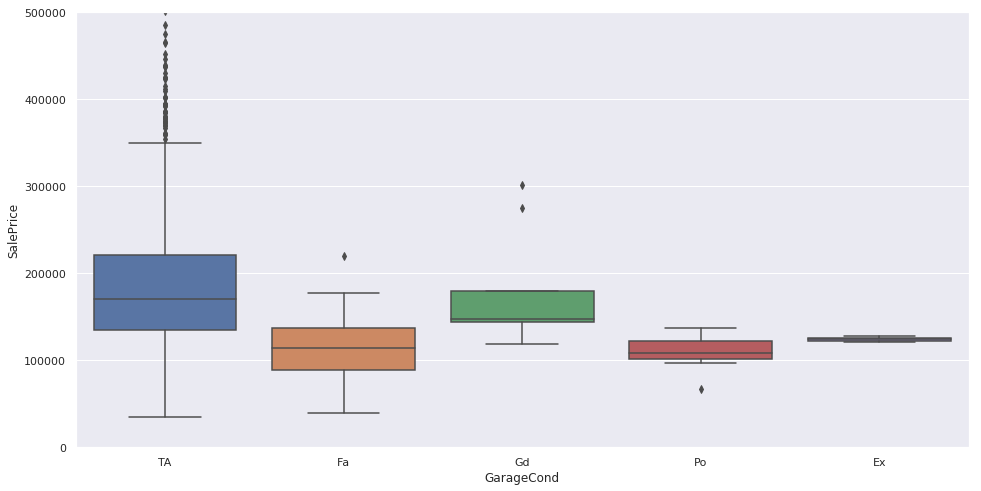

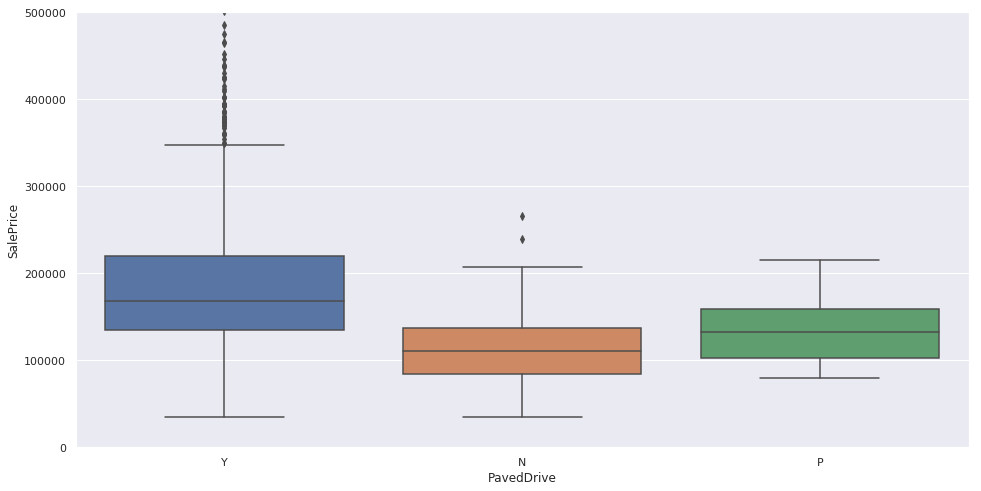

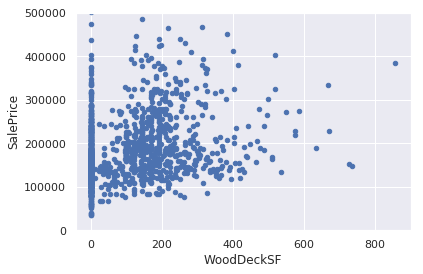

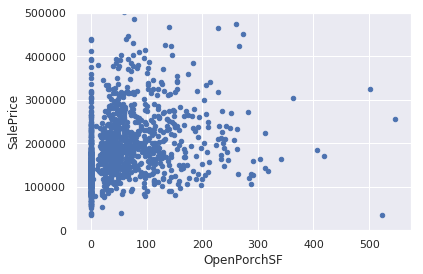

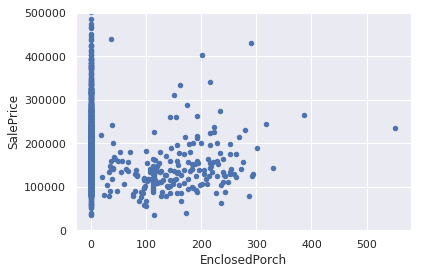

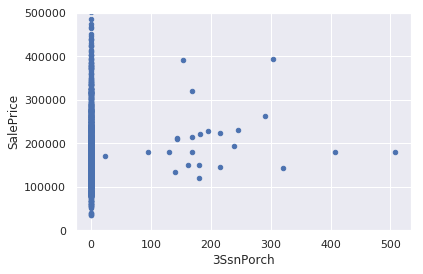

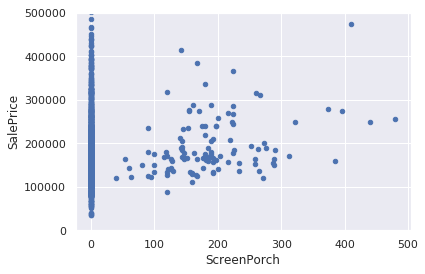

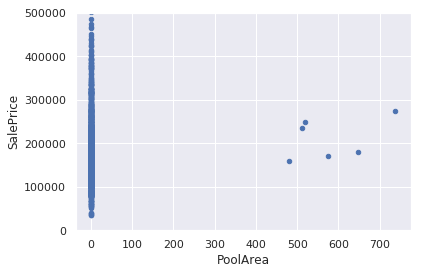

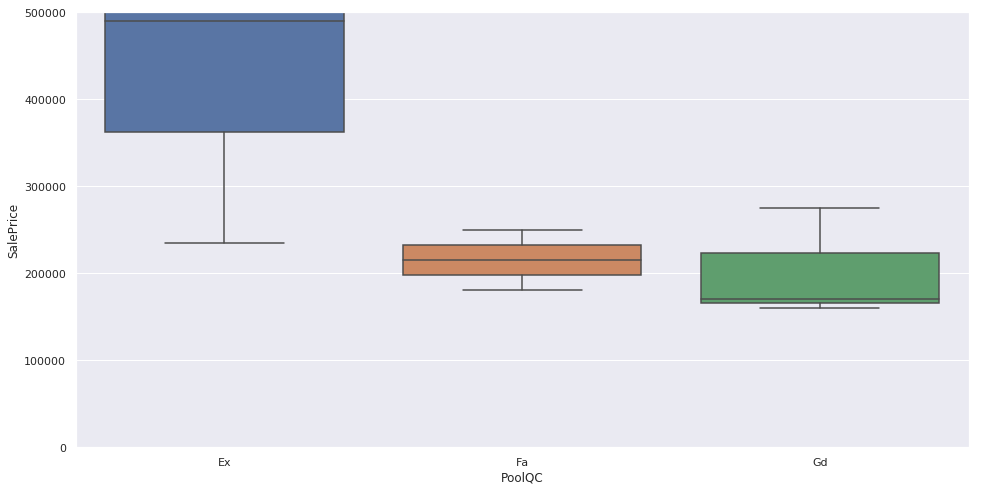

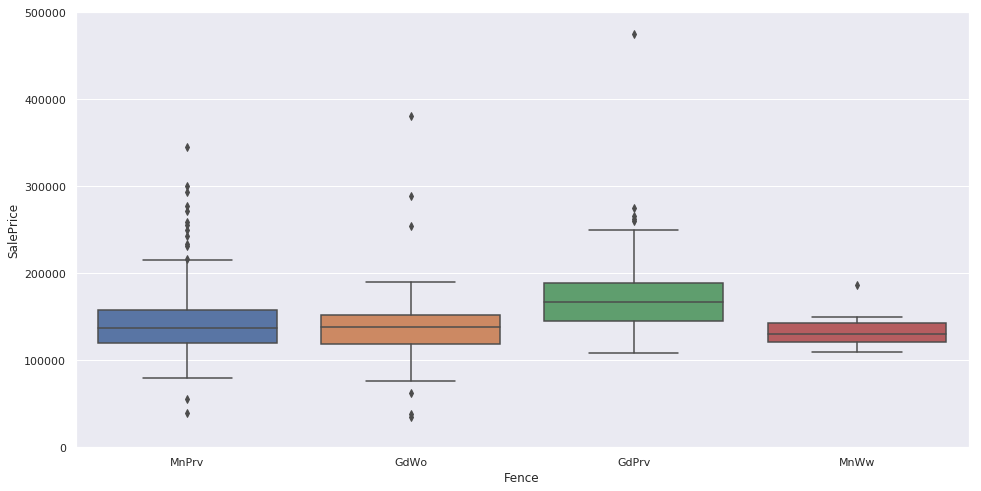

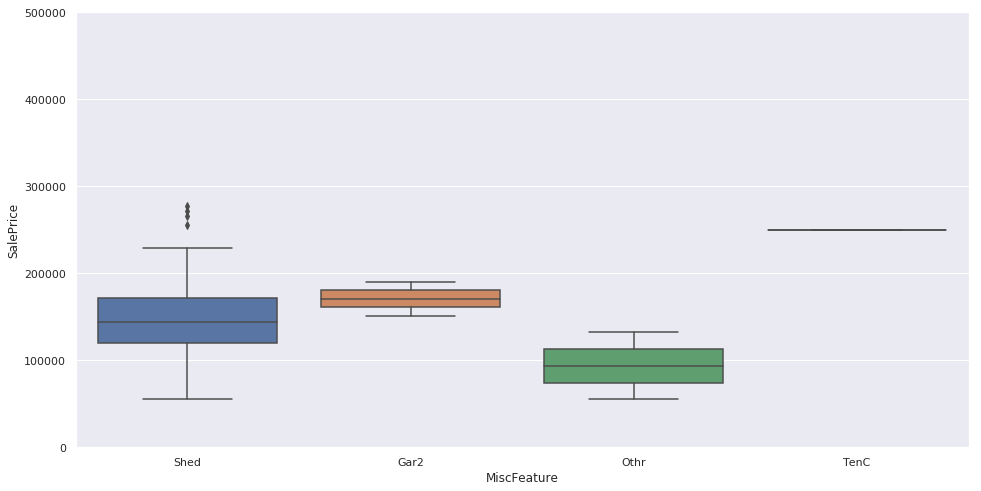

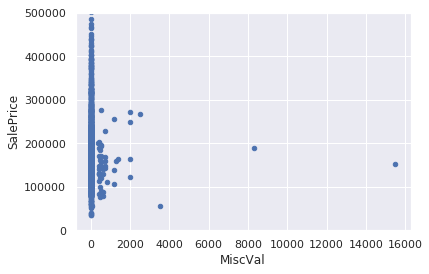

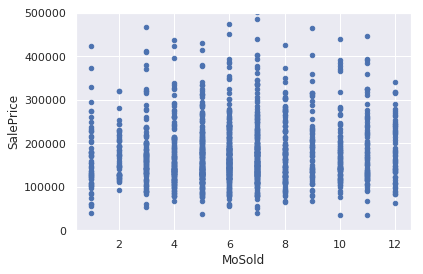

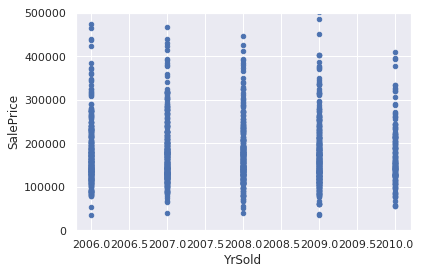

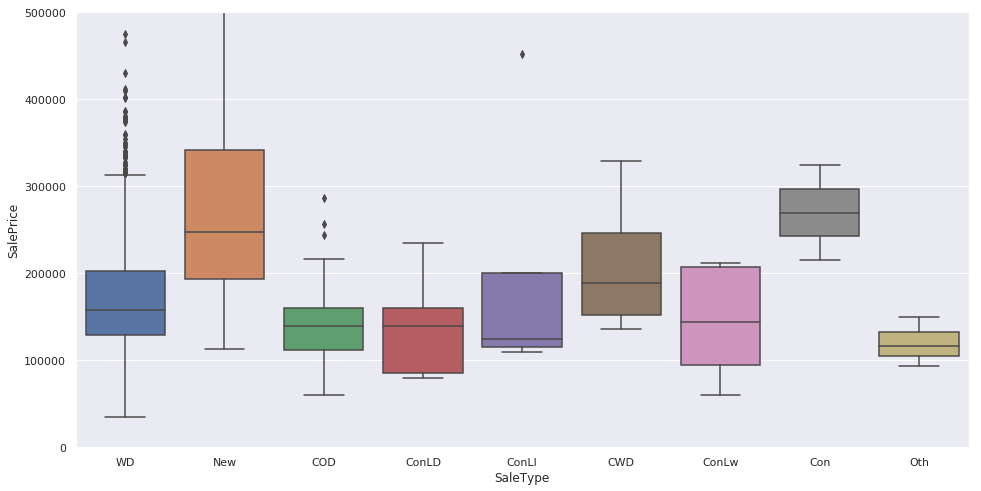

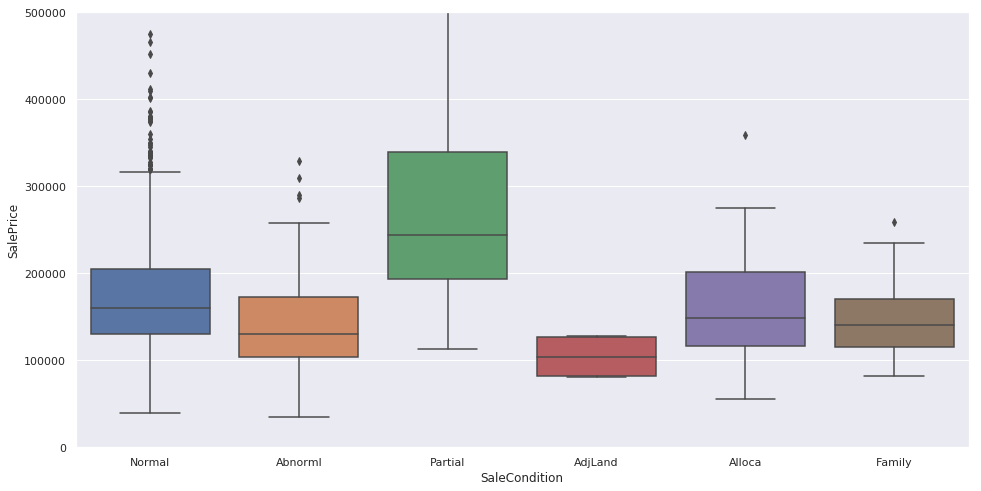

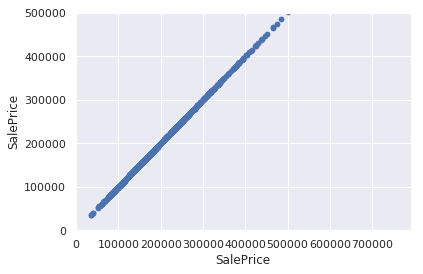

In [13]:
for feature in df_train.columns:
    print(feature)
    if df_train[feature].dtype == 'int64':
#         print('in')
        pass
        eda.scatter_saleprice(feature)
    else:
#         pass
        eda.box_plot(feature, 16, 8)
    print('------------')

In [14]:
print(df_train['SalePrice'].dtype)

int64


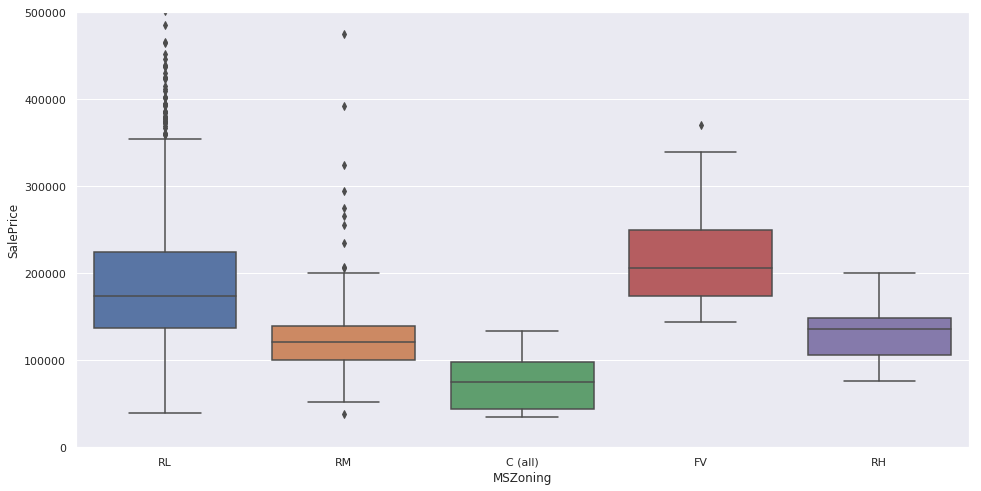

In [15]:
eda.box_plot('MSZoning', 16, 8)

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


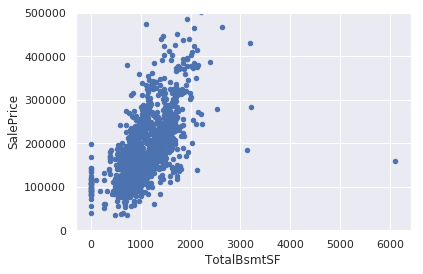

In [17]:
eda.scatter_saleprice('TotalBsmtSF')